<a href="https://colab.research.google.com/github/Abhishekcsds/Uterine_Corpus_Detection/blob/main/Projecttt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/Uterine Corpus Endometrial Carcinoma (1).csv')

In [ ]:
df.head()

,Patient ID,Sample ID,Cancer Type Detailed,Overall Survival Status,Disease Free Status,Disease-specific Survival status,Mutation Count,Fraction Genome Altered,Diagnosis Age,MSI MANTIS Score,MSIsensor Score,Race Category,Subtype,Tumor Type
0,TCGA-2E-A9G8,TCGA-2E-A9G8-01,Uterine Endometrioid Carcinoma,0:LIVING,NaN,0:ALIVE OR DEAD TUMOR FREE,65.0,0.3311,59.0,0.3234,0.85,Black or African American,UCEC_CN_HIGH,Endometrioid Endometrial Adenocarcinoma
1,TCGA-4E-A92E,TCGA-4E-A92E-01,Uterine Endometrioid Carcinoma,0:LIVING,0:DiseaseFree,0:ALIVE OR DEAD TUMOR FREE,147.0,0.0341,54.0,0.3396,0.01,Black or African American,UCEC_CN_LOW,Endometrioid Endometrial Adenocarcinoma
2,TCGA-5B-A90C,TCGA-5B-A90C-01,Uterine Endometrioid Carcinoma,0:LIVING,NaN,0:ALIVE OR DEAD TUMOR FREE,45.0,0.6903,69.0,0.3344,0.55,Black or African American,UCEC_CN_HIGH,Endometrioid Endometrial Adenocarcinoma
3,TCGA-5S-A9Q8,TCGA-5S-A9Q8-01,Uterine Endometrioid Carcinoma,0:LIVING,0:DiseaseFree,0:ALIVE OR DEAD TUMOR FREE,50.0,0.0581,51.0,0.3199,0.09,Black or African American,UCEC_CN_LOW,Endometrioid Endometrial Adenocarcinoma
4,TCGA-A5-A0G1,TCGA-A5-A0G1-01,Uterine Serous Carcinoma/Uterine Papillary Ser...,1:DECEASED,0:DiseaseFree,0:ALIVE OR DEAD TUMOR FREE,10808.0,0.0001,67.0,0.3108,1.74,White,UCEC_POLE,Serous Endometrial Adenocarcinoma


In [ ]:
df.isnull().sum()

,0
Patient ID,0
Sample ID,0
Cancer Type Detailed,0
Overall Survival Status,0
Disease Free Status,115
Disease-specific Survival status,2
Mutation Count,14
Fraction Genome Altered,10
Diagnosis Age,3
MSI MANTIS Score,3


In [ ]:
df= df.drop(columns=['Patient ID','Sample ID'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 529 entries, 0 to 528
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Cancer Type Detailed              529 non-null    object 
 1   Overall Survival Status           529 non-null    object 
 2   Disease Free Status               414 non-null    object 
 3   Disease-specific Survival status  527 non-null    object 
 4   Mutation Count                    515 non-null    float64
 5   Fraction Genome Altered           519 non-null    float64
 6   Diagnosis Age                     526 non-null    float64
 7   MSI MANTIS Score                  526 non-null    float64
 8   MSIsensor Score                   528 non-null    float64
 9   Race Category                     497 non-null    object 
 10  Subtype                           507 non-null    object 
 11  Tumor Type                        529 non-null    object 
dtypes: float

In [ ]:
df.value_counts()

Cancer Type Detailed                                         Overall Survival Status  Disease Free Status    Disease-specific Survival status  Mutation Count  Fraction Genome Altered  Diagnosis Age  MSI MANTIS Score  MSIsensor Score  Race Category              Subtype       Tumor Type                             
Uterine Endometrioid Carcinoma                               0:LIVING                 0:DiseaseFree          0:ALIVE OR DEAD TUMOR FREE        7.0             0.0001                   57.0           0.3502            0.00             Black or African American  UCEC_CN_LOW   Endometrioid Endometrial Adenocarcinoma    1
                                                                                      1:Recurred/Progressed  0:ALIVE OR DEAD TUMOR FREE        39.0            0.0629                   55.0           0.2879            0.52             White                      UCEC_CN_LOW   Endometrioid Endometrial Adenocarcinoma    1
                                                                                      0:DiseaseFree          0:ALIVE OR DEAD TUMOR FREE        13201.0         0.0001                   33.0           0.3086            3.61             Black or African American  UCEC_POLE     Endometrioid Endometrial Adenocarcinoma    1
                                                                                                                                               12694.0         0.0112                   40.0           0.3376            0.41             White                      UCEC_POLE     Endometrioid Endometrial Adenocarcinoma    1
                                                                                                                                               12038.0         0.0195                   59.0           0.3398            0.70             White                      UCEC_POLE     Endometrioid Endometrial Adenocarcinoma    1
                                                                                                                                                                                                                                                                                                                             ..
                                                                                                                                               89.0            0.7039                   71.0           0.3135            1.80             White                      UCEC_CN_HIGH  Endometrioid Endometrial Adenocarcinoma    1
                                                                                                                                               84.0            0.3669                   64.0           0.3761            0.90             White                      UCEC_CN_HIGH  Endometrioid Endometrial Adenocarcinoma    1
                                                                                                                                               80.0            0.0465                   65.0           0.2921            0.09             White                      UCEC_CN_LOW   Endometrioid Endometrial Adenocarcinoma    1
                                                                                                                                                               0.0000                   65.0           0.3053            0.00             Black or African American  UCEC_CN_LOW   Endometrioid Endometrial Adenocarcinoma    1
Uterine Serous Carcinoma/Uterine Papillary Serous Carcinoma  1:DECEASED               1:Recurred/Progressed  1:DEAD WITH TUMOR                 165.0           0.5642                   66.0           0.3093            0.35             White                      UCEC_CN_HIGH  Serous Endometrial Adenocarcinoma          1
Name: count, Length: 363, dtype: int64

In [ ]:
df.value_counts()

Cancer Type Detailed                                         Overall Survival Status  Disease Free Status    Disease-specific Survival status  Mutation Count  Fraction Genome Altered  Diagnosis Age  MSI MANTIS Score  MSIsensor Score  Race Category              Subtype       Tumor Type                             
Uterine Endometrioid Carcinoma                               0:LIVING                 0:DiseaseFree          0:ALIVE OR DEAD TUMOR FREE        7.0             0.0001                   57.0           0.3502            0.00             Black or African American  UCEC_CN_LOW   Endometrioid Endometrial Adenocarcinoma    1
                                                                                      1:Recurred/Progressed  0:ALIVE OR DEAD TUMOR FREE        39.0            0.0629                   55.0           0.2879            0.52             White                      UCEC_CN_LOW   Endometrioid Endometrial Adenocarcinoma    1
                                                                                      0:DiseaseFree          0:ALIVE OR DEAD TUMOR FREE        13201.0         0.0001                   33.0           0.3086            3.61             Black or African American  UCEC_POLE     Endometrioid Endometrial Adenocarcinoma    1
                                                                                                                                               12694.0         0.0112                   40.0           0.3376            0.41             White                      UCEC_POLE     Endometrioid Endometrial Adenocarcinoma    1
                                                                                                                                               12038.0         0.0195                   59.0           0.3398            0.70             White                      UCEC_POLE     Endometrioid Endometrial Adenocarcinoma    1
                                                                                                                                                                                                                                                                                                                             ..
                                                                                                                                               89.0            0.7039                   71.0           0.3135            1.80             White                      UCEC_CN_HIGH  Endometrioid Endometrial Adenocarcinoma    1
                                                                                                                                               84.0            0.3669                   64.0           0.3761            0.90             White                      UCEC_CN_HIGH  Endometrioid Endometrial Adenocarcinoma    1
                                                                                                                                               80.0            0.0465                   65.0           0.2921            0.09             White                      UCEC_CN_LOW   Endometrioid Endometrial Adenocarcinoma    1
                                                                                                                                                               0.0000                   65.0           0.3053            0.00             Black or African American  UCEC_CN_LOW   Endometrioid Endometrial Adenocarcinoma    1
Uterine Serous Carcinoma/Uterine Papillary Serous Carcinoma  1:DECEASED               1:Recurred/Progressed  1:DEAD WITH TUMOR                 165.0           0.5642                   66.0           0.3093            0.35             White                      UCEC_CN_HIGH  Serous Endometrial Adenocarcinoma          1
Name: count, Length: 363, dtype: int64

In [ ]:
df.describe()

,Mutation Count,Fraction Genome Altered,Diagnosis Age,MSI MANTIS Score,MSIsensor Score
count,515.000000,519.000000,526.00000,526.000000,528.000000
mean,1046.423301,0.185959,63.76616,0.438948,6.395890
std,2734.365494,0.226088,11.06003,0.239666,10.175853
min,7.000000,0.000000,31.00000,0.237000,0.000000
25%,47.000000,0.003600,57.00000,0.283950,0.110000
50%,76.000000,0.067800,64.00000,0.311300,0.435000
75%,563.500000,0.314450,71.00000,0.543225,10.117500
max,25696.000000,0.948700,90.00000,1.304900,40.430000


In [ ]:
df['Cancer Type Detailed'].unique()

array(['Uterine Endometrioid Carcinoma',
       'Uterine Serous Carcinoma/Uterine Papillary Serous Carcinoma',
       'Uterine Mixed Endometrial Carcinoma'], dtype=object)

In [ ]:
df['Cancer Type Detailed'].value_counts()

,count
Cancer Type Detailed,
Uterine Endometrioid Carcinoma,399
Uterine Serous Carcinoma/Uterine Papillary Serous Carcinoma,109
Uterine Mixed Endometrial Carcinoma,21


In [ ]:
import warnings
warnings.filterwarnings('ignore')

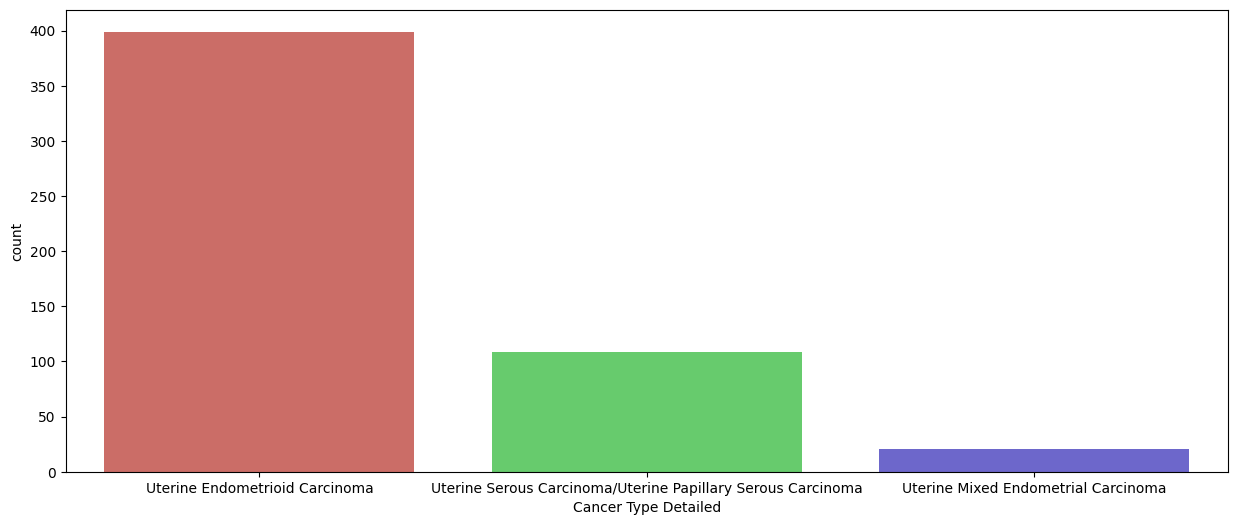

In [ ]:
plt.figure(figsize=(15,6))
sns.countplot(x= 'Cancer Type Detailed', data=df, palette='hls')
plt.show()

In [ ]:
df.nunique()

,0
Cancer Type Detailed,3
Overall Survival Status,2
Disease Free Status,2
Disease-specific Survival status,2
Mutation Count,288
Fraction Genome Altered,355
Diagnosis Age,59
MSI MANTIS Score,465
MSIsensor Score,279
Race Category,5


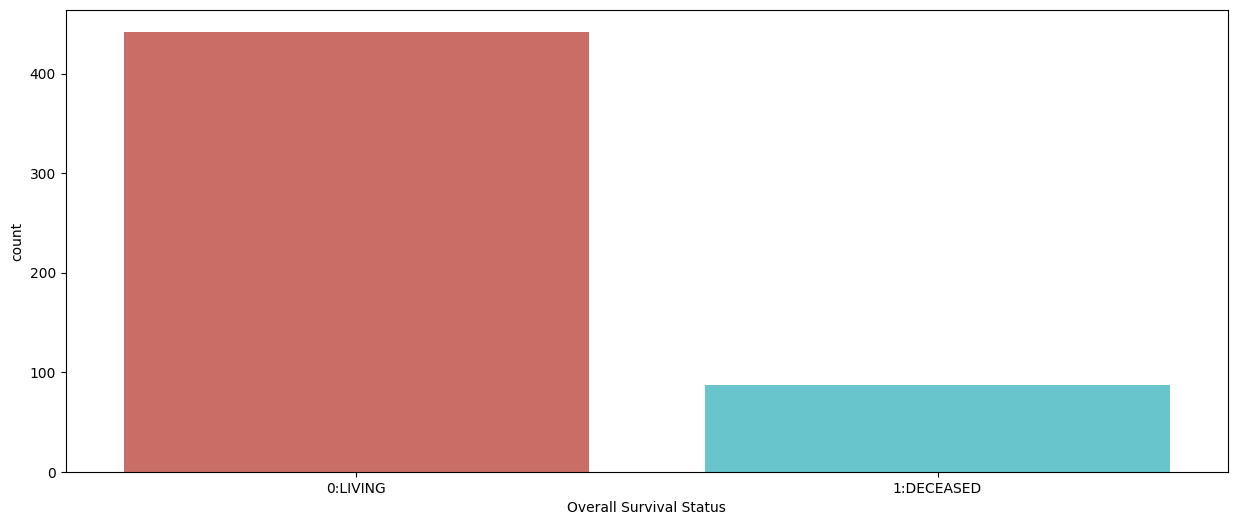

In [ ]:
plt.figure(figsize=(15,6))
sns.countplot(x='Overall Survival Status',data=df,palette='hls')
plt.show()

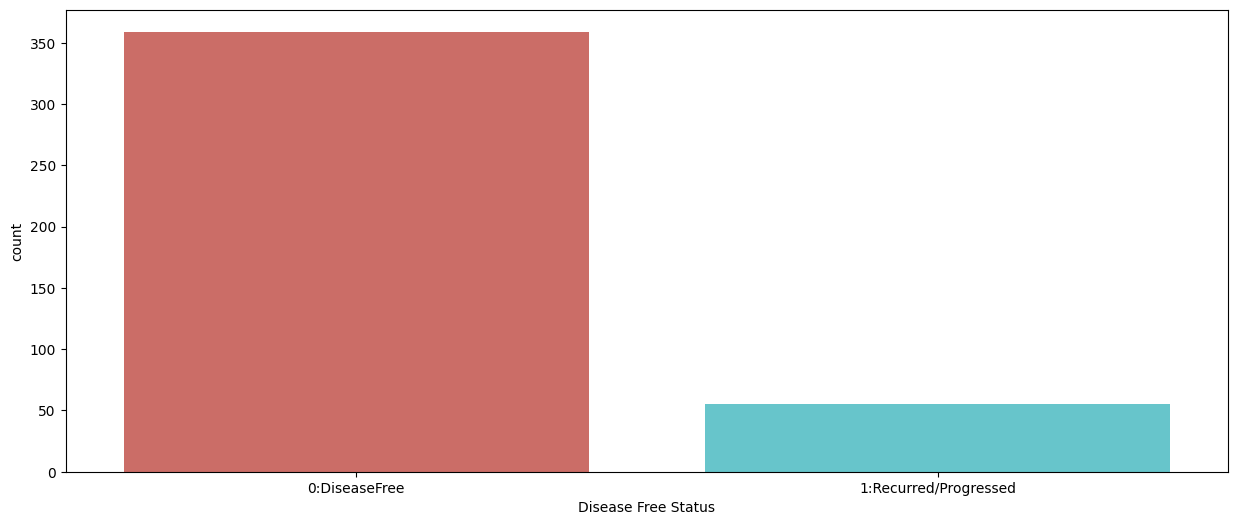

In [ ]:
plt.figure(figsize=(15,6))
sns.countplot(x='Disease Free Status',data=df,palette='hls')
plt.show()

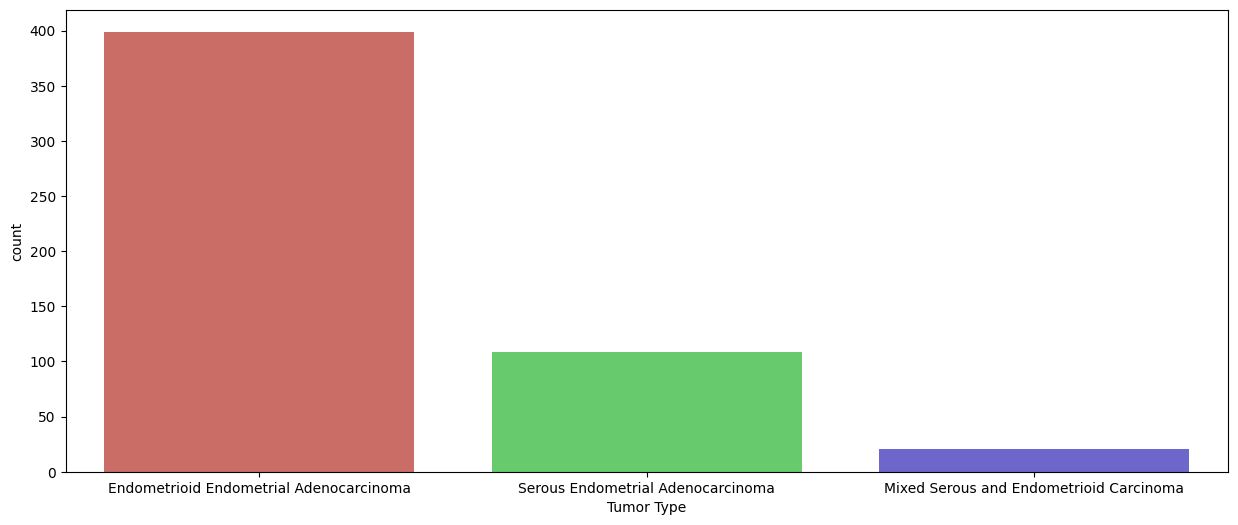

In [ ]:
plt.figure(figsize=(15,6))
sns.countplot(x='Tumor Type',data=df,palette='hls')
plt.show()

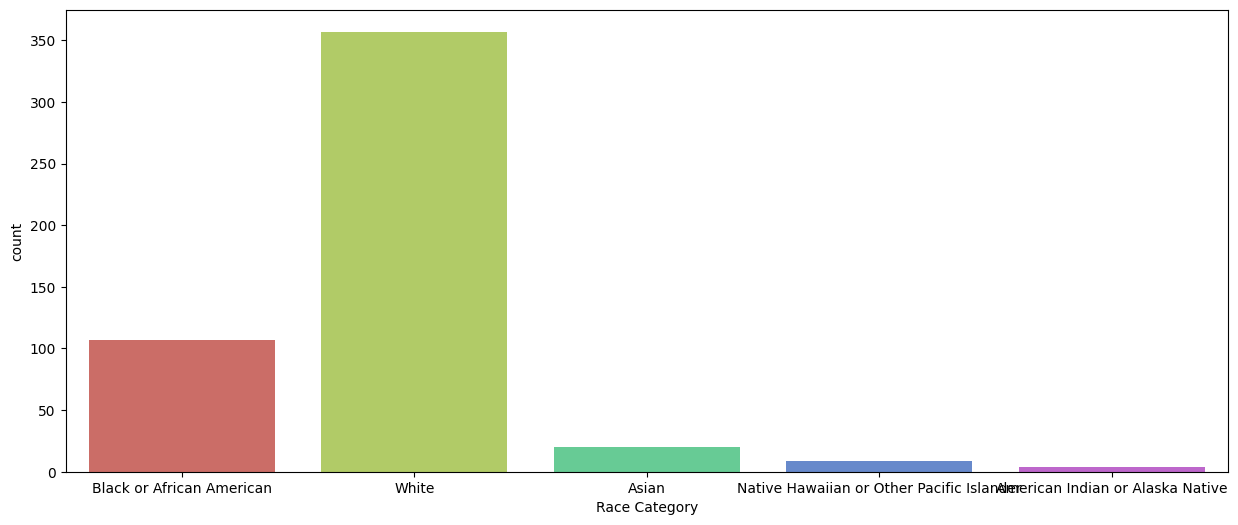

In [ ]:
plt.figure(figsize=(15,6))
sns.countplot(x='Race Category', data=df,palette='hls')
plt.show()

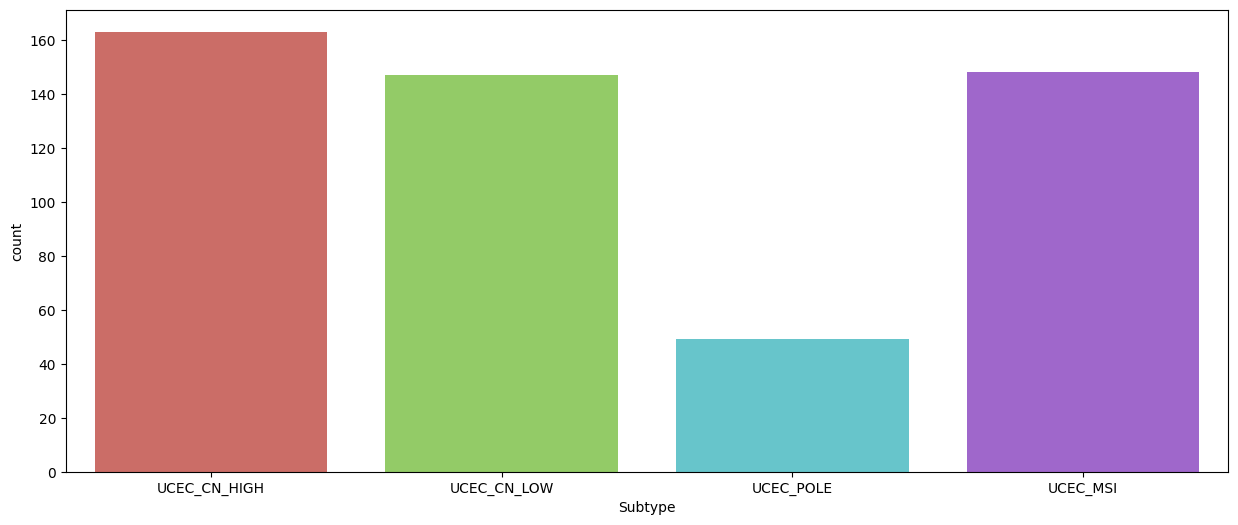

In [ ]:
plt.figure(figsize=(15,6))
sns.countplot(x='Subtype',data=df,palette='hls')
plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 529 entries, 0 to 528
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Cancer Type Detailed              529 non-null    object 
 1   Overall Survival Status           529 non-null    object 
 2   Disease Free Status               414 non-null    object 
 3   Disease-specific Survival status  527 non-null    object 
 4   Mutation Count                    515 non-null    float64
 5   Fraction Genome Altered           519 non-null    float64
 6   Diagnosis Age                     526 non-null    float64
 7   MSI MANTIS Score                  526 non-null    float64
 8   MSIsensor Score                   528 non-null    float64
 9   Race Category                     497 non-null    object 
 10  Subtype                           507 non-null    object 
 11  Tumor Type                        529 non-null    object 
dtypes: float

unique values in categorical columns:
Cancer Type Detailed:['Uterine Endometrioid Carcinoma'
 'Uterine Serous Carcinoma/Uterine Papillary Serous Carcinoma'
 'Uterine Mixed Endometrial Carcinoma']
Overall Survival Status:['0:LIVING' '1:DECEASED']
Disease Free Status:[nan '0:DiseaseFree' '1:Recurred/Progressed']
Disease-specific Survival status:['0:ALIVE OR DEAD TUMOR FREE' '1:DEAD WITH TUMOR' nan]
Race Category:['Black or African American' 'White' 'Asian' nan
 'Native Hawaiian or Other Pacific Islander'
 'American Indian or Alaska Native']
Subtype:['UCEC_CN_HIGH' 'UCEC_CN_LOW' 'UCEC_POLE' nan 'UCEC_MSI']
Tumor Type:['Endometrioid Endometrial Adenocarcinoma'
 'Serous Endometrial Adenocarcinoma'
 'Mixed Serous and Endometrioid Carcinoma']


<function matplotlib.pyplot.show(close=None, block=None)>

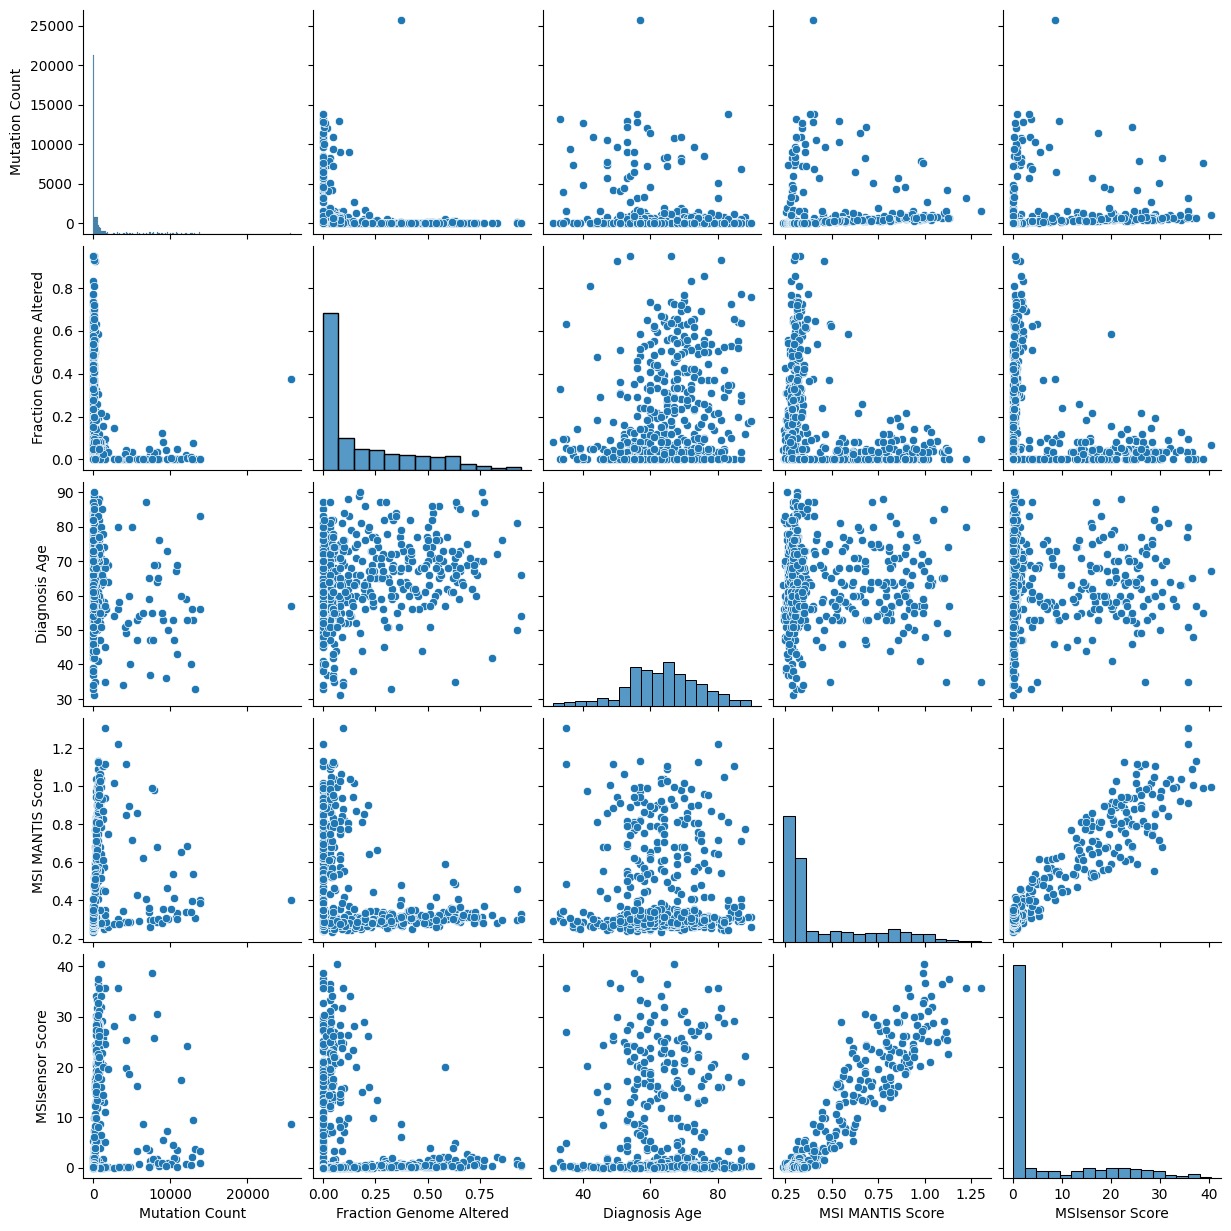

In [ ]:
print("unique values in categorical columns:")
for col in df.select_dtypes(include='object').columns:
    print(f"{col}:{df[col].unique()}")
sns.pairplot(df,palette='hls')
plt.show

In [ ]:
object_columns = df.select_dtypes(include=['object']).columns
print("object type columns")
print(object_columns)

object type columns
Index(['Cancer Type Detailed', 'Overall Survival Status',
       'Disease Free Status', 'Disease-specific Survival status',
       'Race Category', 'Subtype', 'Tumor Type'],
      dtype='object')


In [ ]:
from sklearn.preprocessing import LabelEncoder
labelencoder= LabelEncoder() #initializing an object of class LabelEncoder
df['Cancer Type Detailed'] = labelencoder.fit_transform(df['Cancer Type Detailed'])
df['Overall Survival Status'] = labelencoder.fit_transform(df['Overall Survival Status'])
df['Race Category'] = labelencoder.fit_transform(df['Race Category'])
df['Subtype'] = labelencoder.fit_transform(df['Subtype'])
df['Tumor Type'] = labelencoder.fit_transform(df['Tumor Type'])
df['Disease Free Status'] = labelencoder.fit_transform(df['Disease Free Status'])
df['Disease-specific Survival status'] = labelencoder.fit_transform(df['Disease-specific Survival status'])

In [ ]:
df.head()

,Cancer Type Detailed,Overall Survival Status,Disease Free Status,Disease-specific Survival status,Mutation Count,Fraction Genome Altered,Diagnosis Age,MSI MANTIS Score,MSIsensor Score,Race Category,Subtype,Tumor Type
0,0,0,2,0,65.0,0.3311,59.0,0.3234,0.85,2,0,0
1,0,0,0,0,147.0,0.0341,54.0,0.3396,0.01,2,1,0
2,0,0,2,0,45.0,0.6903,69.0,0.3344,0.55,2,0,0
3,0,0,0,0,50.0,0.0581,51.0,0.3199,0.09,2,1,0
4,2,1,0,0,10808.0,0.0001,67.0,0.3108,1.74,4,3,2


In [ ]:
df['Disease-specific Survival status'] = labelencoder.fit_transform(df['Disease-specific Survival status'])

In [ ]:
df.dropna()

,Cancer Type Detailed,Overall Survival Status,Disease Free Status,Disease-specific Survival status,Mutation Count,Fraction Genome Altered,Diagnosis Age,MSI MANTIS Score,MSIsensor Score,Race Category,Subtype,Tumor Type
0,0,0,2,0,65.0,0.3311,59.0,0.3234,0.85,2,0,0
1,0,0,0,0,147.0,0.0341,54.0,0.3396,0.01,2,1,0
2,0,0,2,0,45.0,0.6903,69.0,0.3344,0.55,2,0,0
3,0,0,0,0,50.0,0.0581,51.0,0.3199,0.09,2,1,0
4,2,1,0,0,10808.0,0.0001,67.0,0.3108,1.74,4,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...
524,2,1,2,1,63.0,0.6549,85.0,0.3647,0.15,2,0,2
525,0,0,0,0,1306.0,0.0275,64.0,0.6138,14.35,2,2,0
526,0,0,0,0,56.0,0.0466,61.0,0.3382,0.00,2,1,0
527,0,0,2,0,48.0,0.4226,73.0,0.3503,0.03,2,0,0


In [ ]:
df.corr()

,Cancer Type Detailed,Overall Survival Status,Disease Free Status,Disease-specific Survival status,Mutation Count,Fraction Genome Altered,Diagnosis Age,MSI MANTIS Score,MSIsensor Score,Race Category,Subtype,Tumor Type
Cancer Type Detailed,1.000000,0.242925,0.161151,0.223423,-0.108935,0.501784,0.239079,-0.260660,-0.279204,-0.065378,-0.472542,1.000000
Overall Survival Status,0.242925,1.000000,0.389453,0.792816,-0.092504,0.261608,0.121026,-0.086168,-0.101894,-0.019944,-0.170835,0.242925
Disease Free Status,0.161151,0.389453,1.000000,0.484527,-0.060166,0.236979,0.092332,-0.016273,-0.040358,-0.081267,-0.192574,0.161151
Disease-specific Survival status,0.223423,0.792816,0.484527,1.000000,-0.087383,0.237398,0.029101,-0.096130,-0.105552,-0.058099,-0.199978,0.223423
Mutation Count,-0.108935,-0.092504,-0.060166,-0.087383,1.000000,-0.233682,-0.190637,0.092712,0.093168,0.011718,0.518953,-0.108935
Fraction Genome Altered,0.501784,0.261608,0.236979,0.237398,-0.233682,1.000000,0.261683,-0.332012,-0.351999,-0.069510,-0.586200,0.501784
Diagnosis Age,0.239079,0.121026,0.092332,0.029101,-0.190637,0.261683,1.000000,-0.043860,-0.028638,0.067249,-0.259022,0.239079
MSI MANTIS Score,-0.260660,-0.086168,-0.016273,-0.096130,0.092712,-0.332012,-0.043860,1.000000,0.948122,0.046303,0.436293,-0.260660
MSIsensor Score,-0.279204,-0.101894,-0.040358,-0.105552,0.093168,-0.351999,-0.028638,0.948122,1.000000,0.022073,0.457016,-0.279204
Race Category,-0.065378,-0.019944,-0.081267,-0.058099,0.011718,-0.069510,0.067249,0.046303,0.022073,1.000000,0.043935,-0.065378


In [ ]:
df

,Cancer Type Detailed,Overall Survival Status,Disease Free Status,Disease-specific Survival status,Mutation Count,Fraction Genome Altered,Diagnosis Age,MSI MANTIS Score,MSIsensor Score,Race Category,Subtype,Tumor Type
0,0,0,2,0,65.0,0.3311,59.0,0.3234,0.85,2,0,0
1,0,0,0,0,147.0,0.0341,54.0,0.3396,0.01,2,1,0
2,0,0,2,0,45.0,0.6903,69.0,0.3344,0.55,2,0,0
3,0,0,0,0,50.0,0.0581,51.0,0.3199,0.09,2,1,0
4,2,1,0,0,10808.0,0.0001,67.0,0.3108,1.74,4,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...
524,2,1,2,1,63.0,0.6549,85.0,0.3647,0.15,2,0,2
525,0,0,0,0,1306.0,0.0275,64.0,0.6138,14.35,2,2,0
526,0,0,0,0,56.0,0.0466,61.0,0.3382,0.00,2,1,0
527,0,0,2,0,48.0,0.4226,73.0,0.3503,0.03,2,0,0


In [ ]:
def classify_features(df):
    categorical_features=[]
    non_categorical_features=[]
    discrete_features=[]
    continuous_features=[]
    for column in df.columns:
        if df[column].dtype == 'Object':
            if df[column].dtype < 10:
                categorical_features.append(column)
            else:
                non_categorical_features.append(column)
        elif df[column].dtype in['object','float64']:
            if df[column].nunique() <10:
                discreate_features.append(column)
            else:
                continuous_features.append(column)
    return categorical_features, non_categorical_features,discrete_features,continuous_features
categorical,non_categorical,discrete,continuous = classify_features(df)

print("Categorical features:",categorical)
print("Non-categorical features:", non_categorical)
print("Discrete features:",discrete)
print("continuous features:",continuous)

Categorical features: []
Non-categorical features: []
Discrete features: []
continuous features: ['Mutation Count', 'Fraction Genome Altered', 'Diagnosis Age', 'MSI MANTIS Score', 'MSIsensor Score']


In [ ]:
for i in discrete:
    print(i)
    print(df[i].unique())
    print()

In [ ]:
for i in discrete:
    print(df[i].value_counts())
    print()

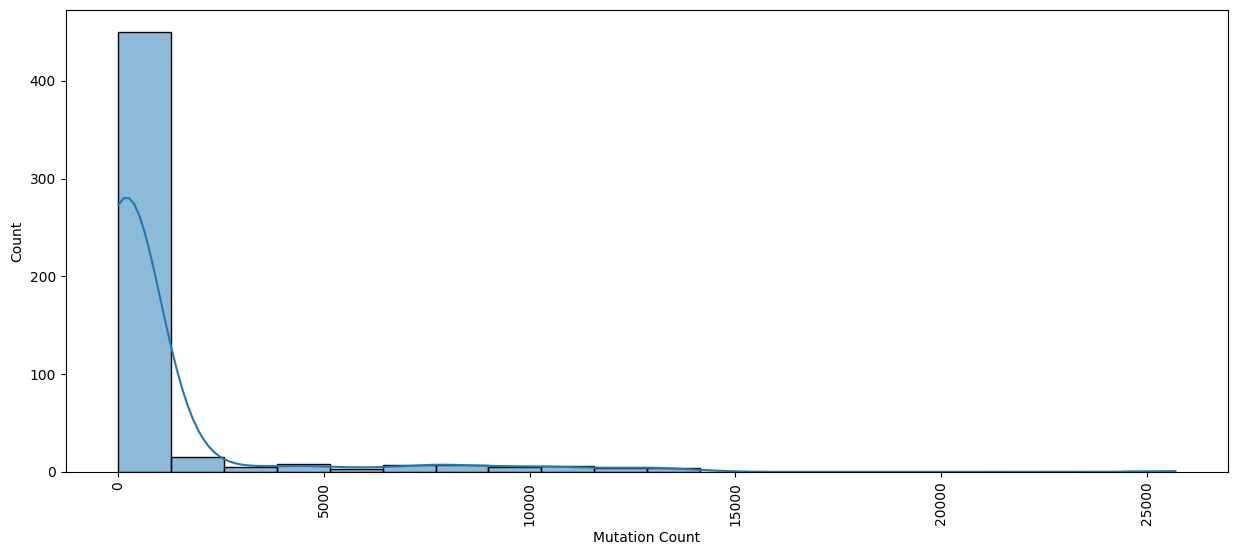

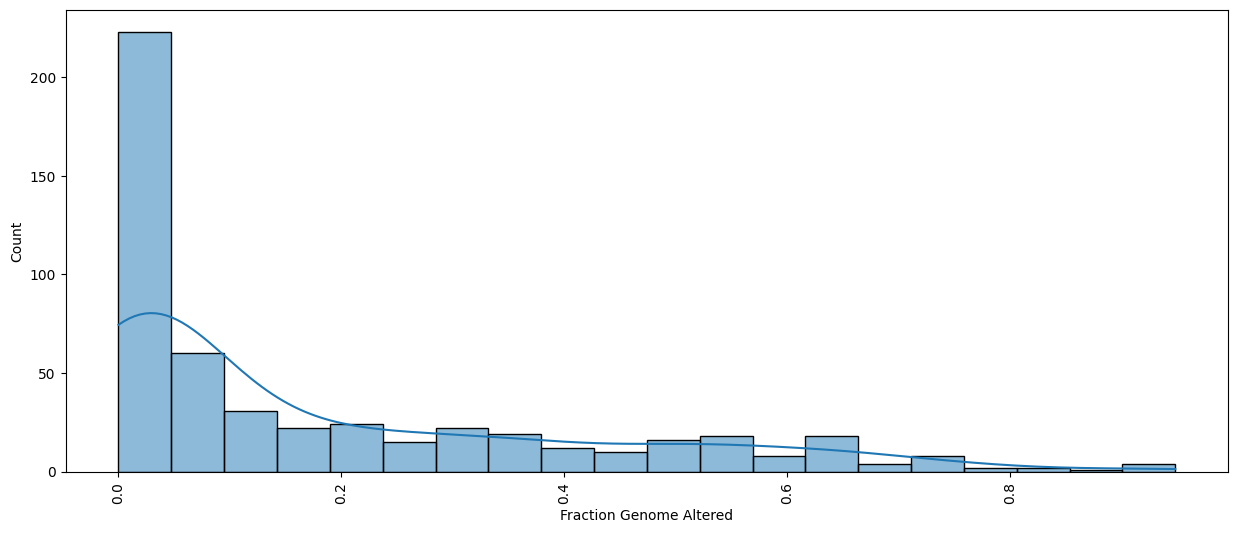

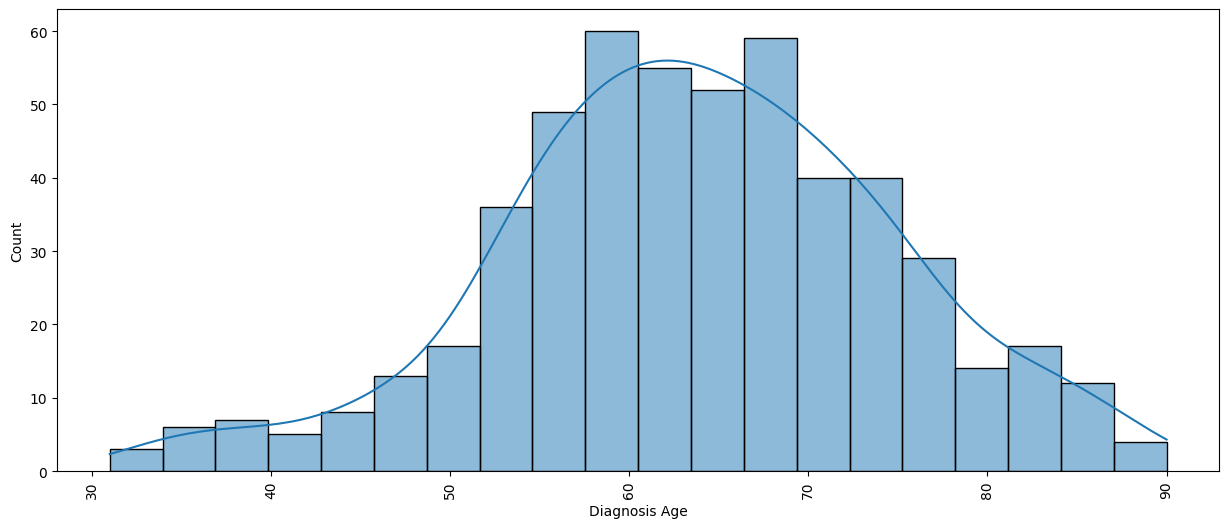

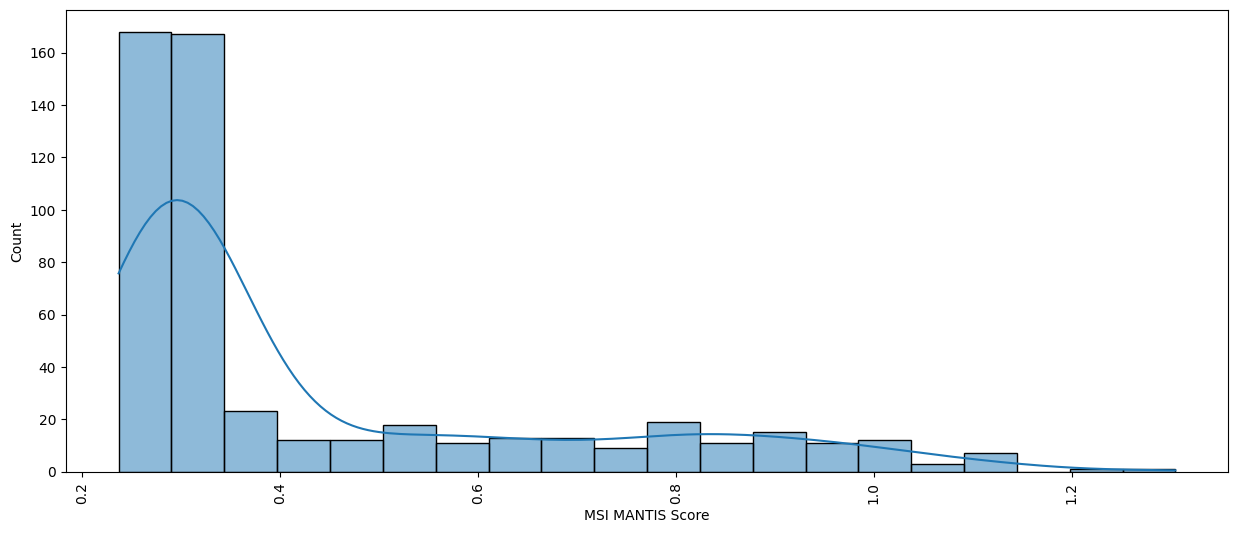

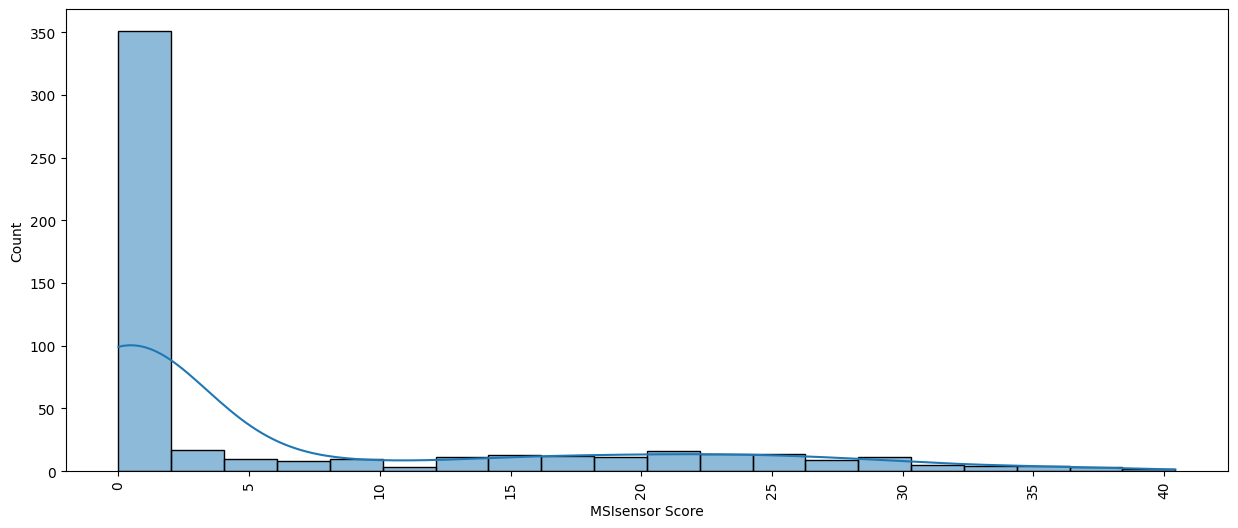

In [ ]:
for i in continuous:
    plt.figure(figsize=(15,6))
    sns.histplot(df[i],bins=20,kde=True,palette='hls')
    plt.xticks(rotation=90)
    plt.show()

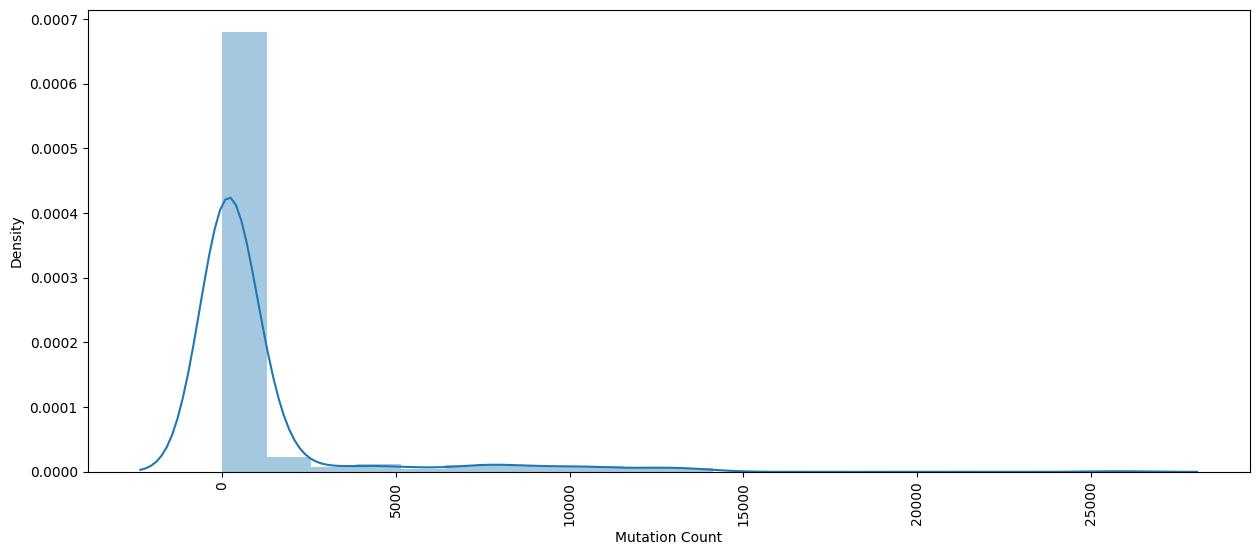

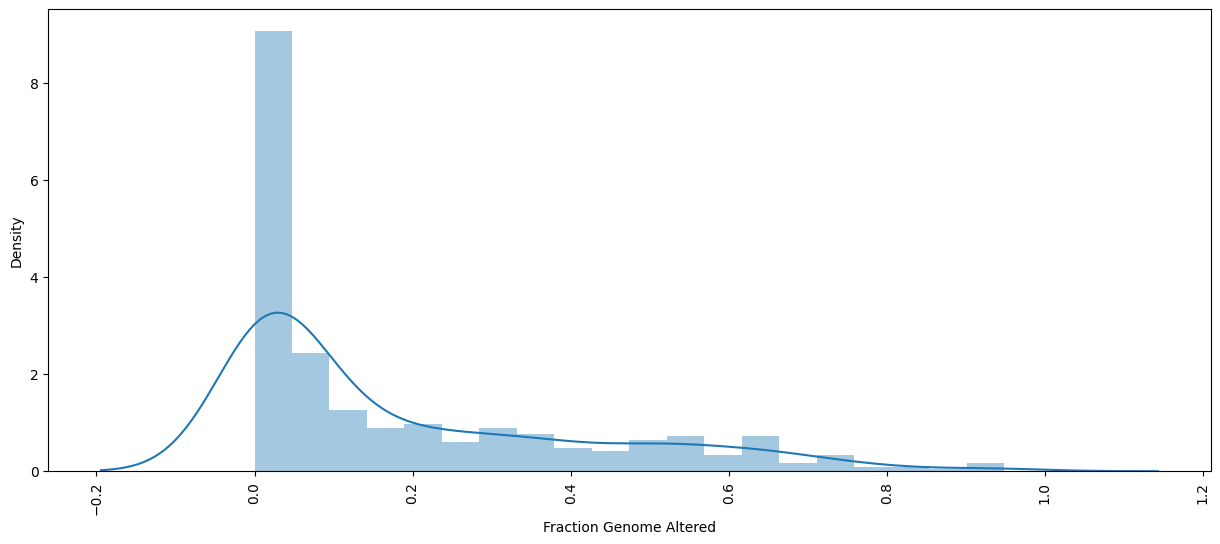

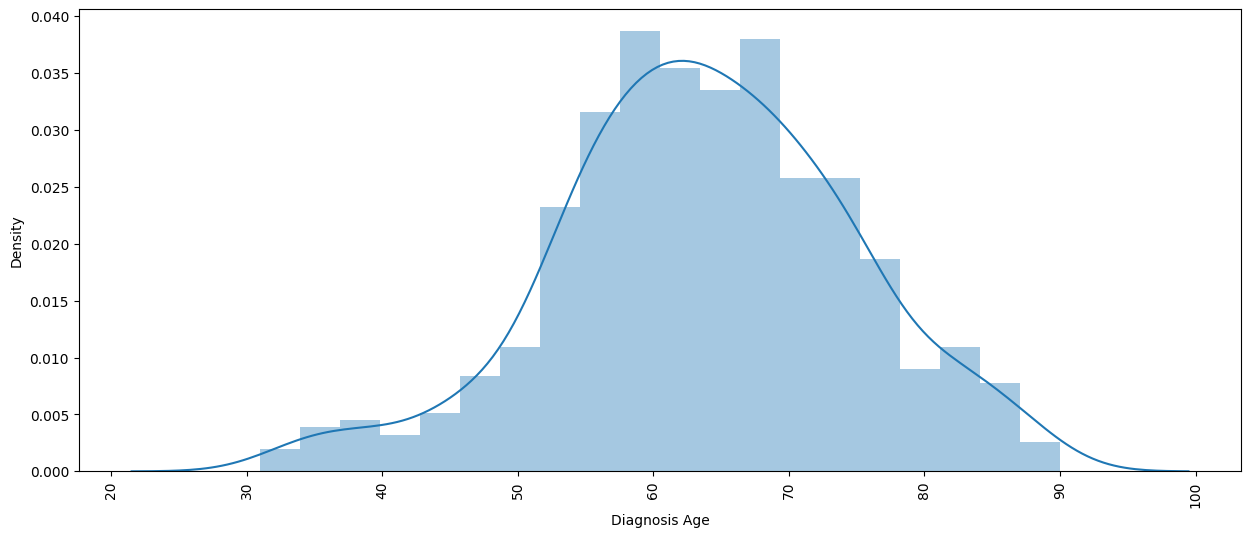

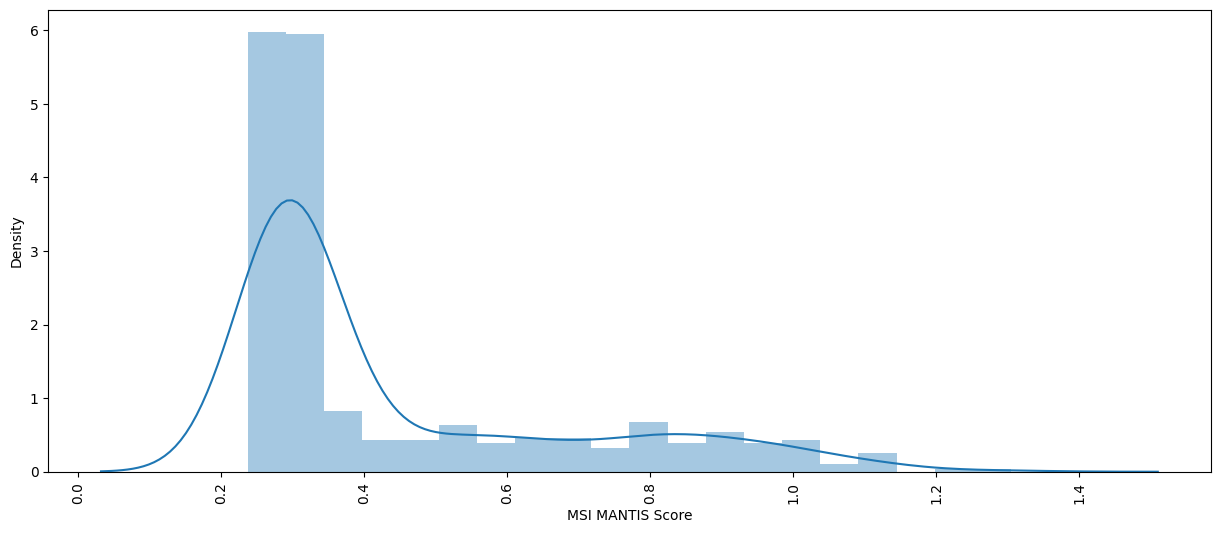

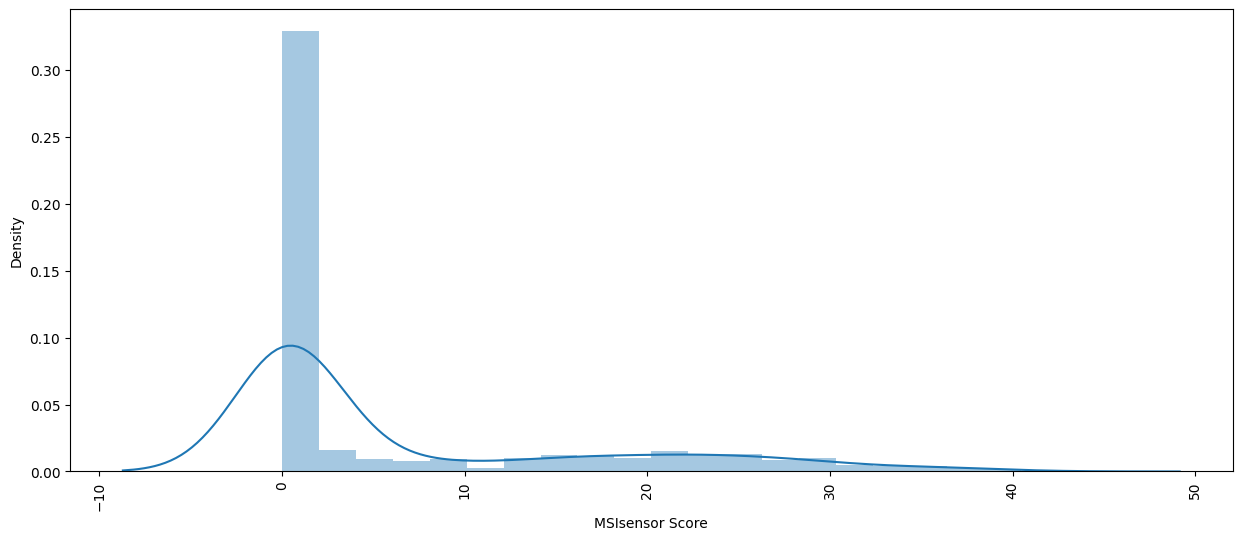

In [ ]:
for i in continuous:
    plt.figure(figsize=(15,6))
    sns.distplot(df[i],bins=20,kde=True)
    plt.xticks(rotation=90)
    plt.show()

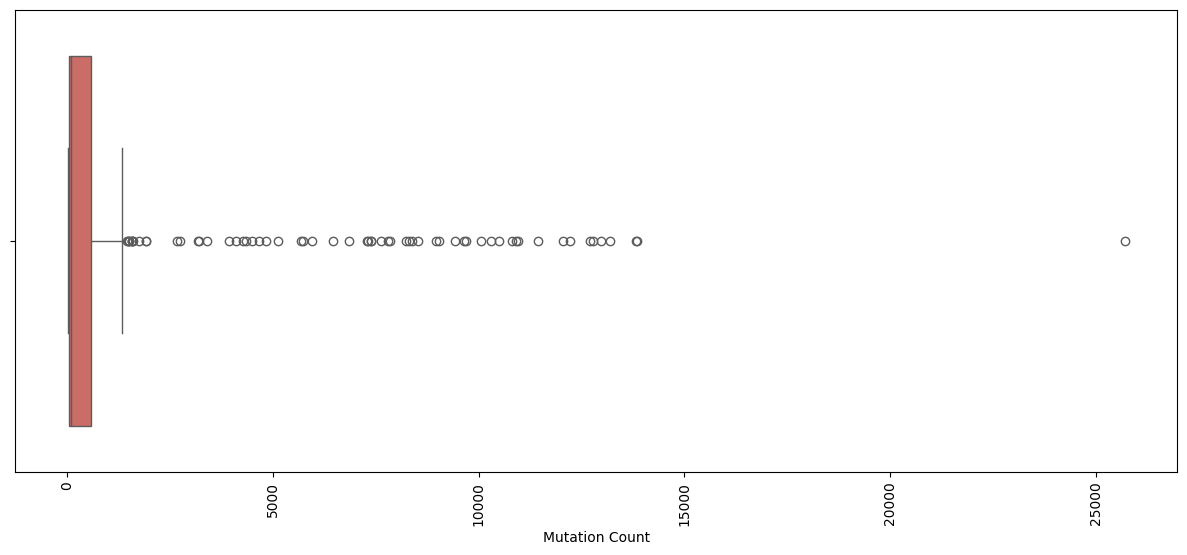

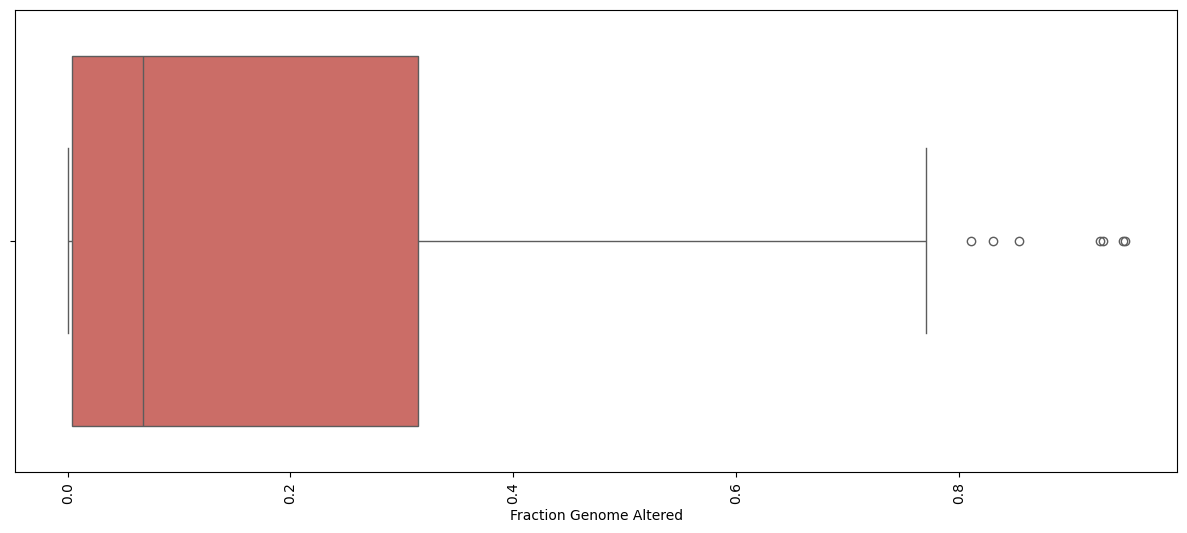

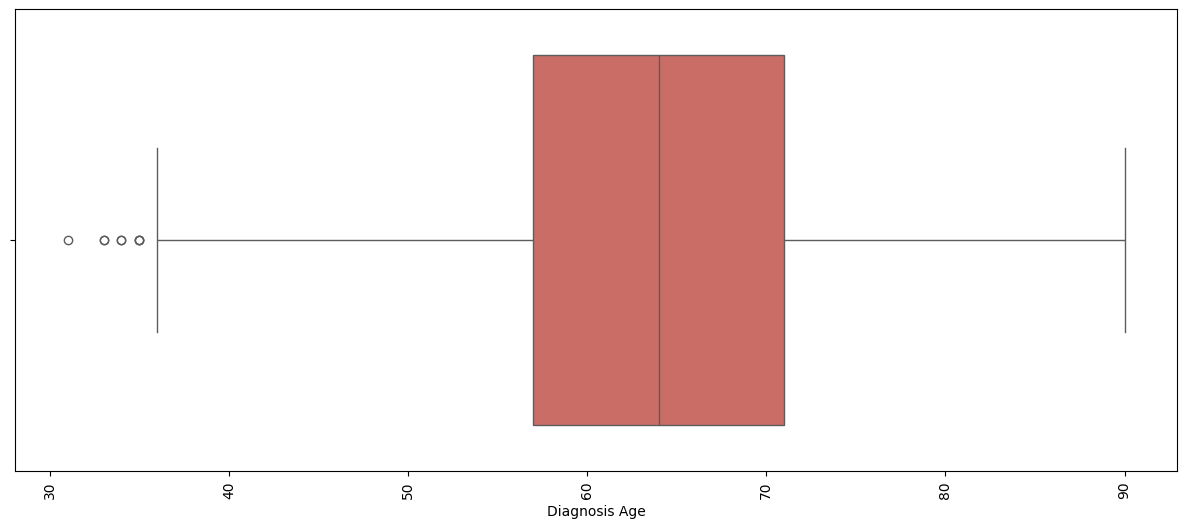

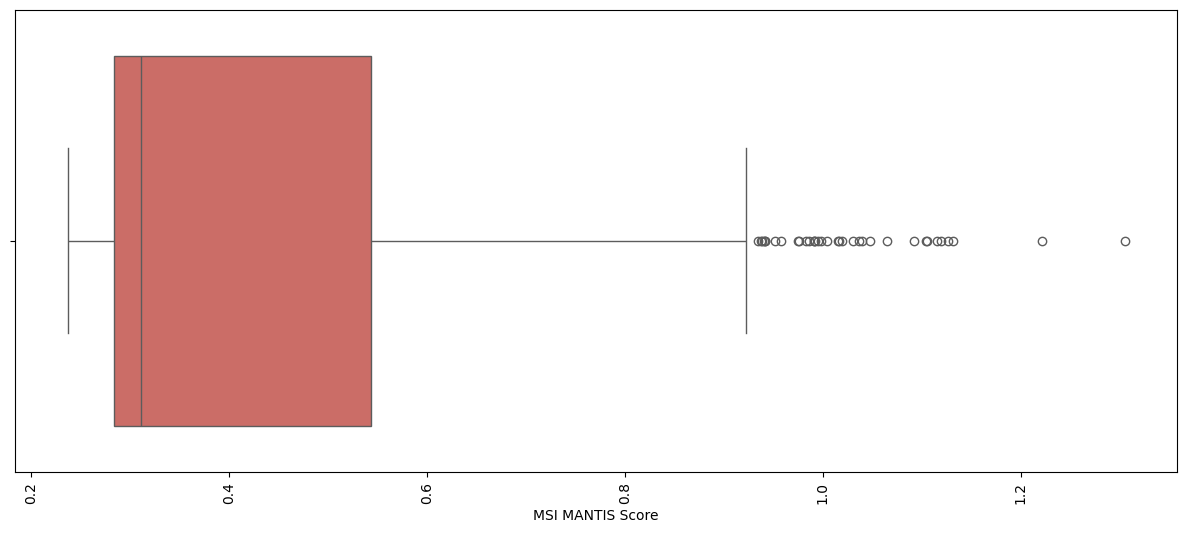

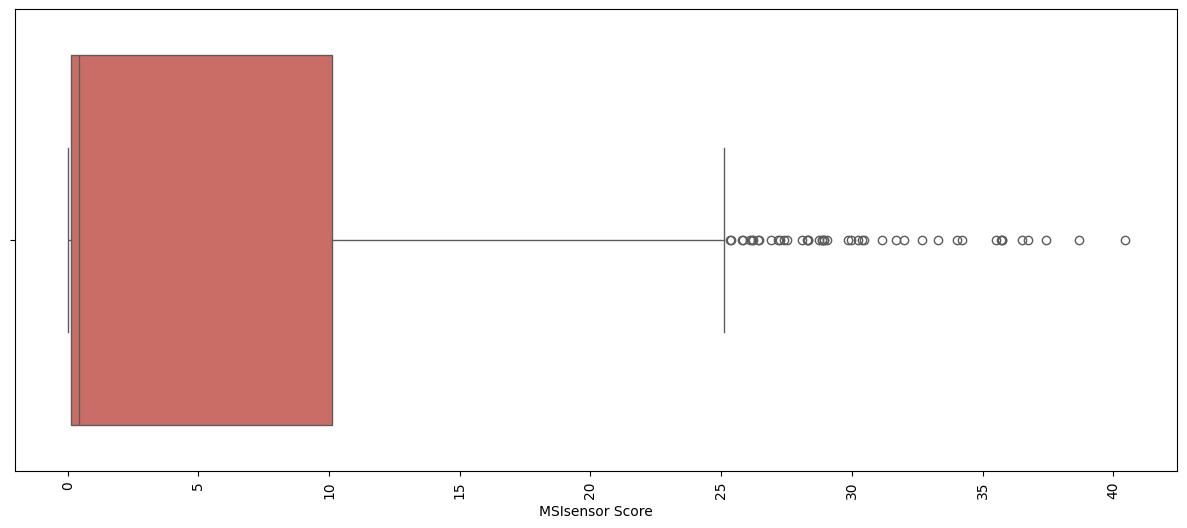

In [ ]:
for i in continuous:
    plt.figure(figsize=(15,6))
    sns.boxplot(x=i,data=df,palette='hls')
    plt.xticks(rotation=90)
    plt.show()

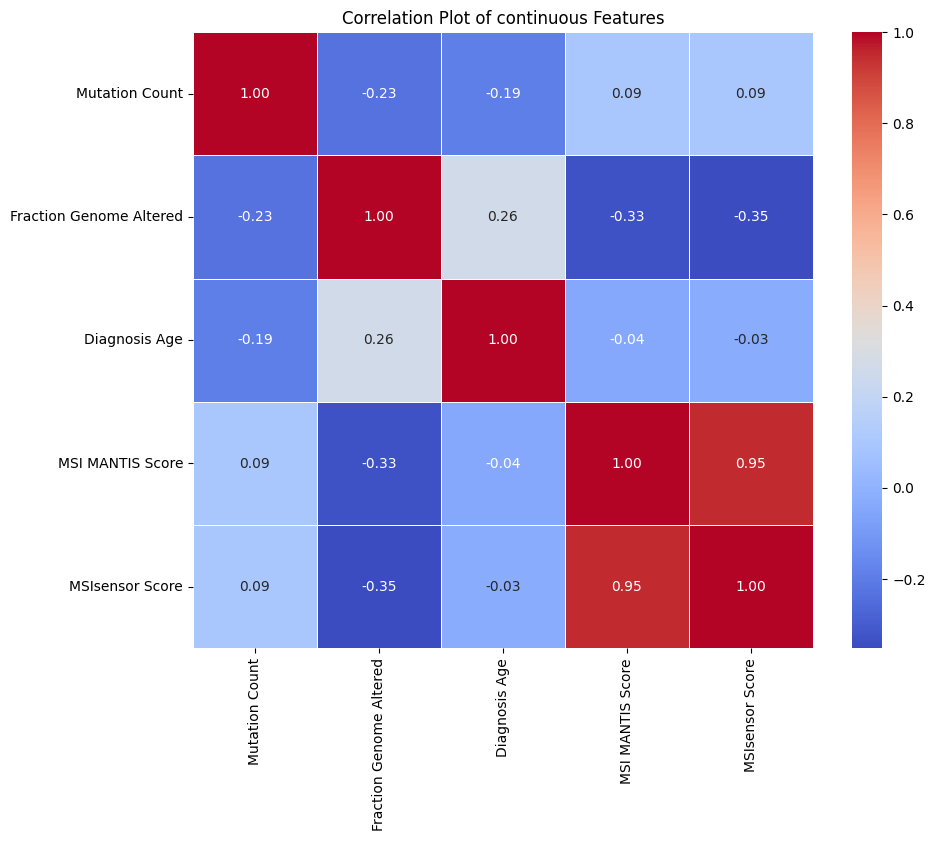

In [ ]:
corr_matrix = df[continuous].corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix,annot=True,cmap='coolwarm',fmt=".2f",linewidth=0.5)
plt.title('Correlation Plot of continuous Features')
plt.show()

In [ ]:
corr_matrix

,Mutation Count,Fraction Genome Altered,Diagnosis Age,MSI MANTIS Score,MSIsensor Score
Mutation Count,1.000000,-0.233682,-0.190637,0.092712,0.093168
Fraction Genome Altered,-0.233682,1.000000,0.261683,-0.332012,-0.351999
Diagnosis Age,-0.190637,0.261683,1.000000,-0.043860,-0.028638
MSI MANTIS Score,0.092712,-0.332012,-0.043860,1.000000,0.948122
MSIsensor Score,0.093168,-0.351999,-0.028638,0.948122,1.000000


In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [ ]:
X= df.drop(columns=['Tumor Type'])
y=df['Tumor Type']

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,stratify = y,random_state=42)

In [ ]:
X_train

,Cancer Type Detailed,Overall Survival Status,Disease Free Status,Disease-specific Survival status,Mutation Count,Fraction Genome Altered,Diagnosis Age,MSI MANTIS Score,MSIsensor Score,Race Category,Subtype
409,0,0,0,0,588.0,0.0346,64.0,0.7904,25.06,4,2
349,0,0,0,0,42.0,0.0003,49.0,0.2708,0.05,4,1
378,0,0,0,0,5948.0,0.0000,54.0,0.2907,0.78,4,3
28,0,0,1,0,77.0,0.0000,81.0,0.2859,0.07,4,1
344,0,0,0,0,63.0,0.1588,64.0,0.2651,0.00,4,1
...,...,...,...,...,...,...,...,...,...,...,...
405,0,0,2,0,1323.0,0.0003,55.0,0.2880,0.00,5,3
296,0,0,0,0,70.0,0.8106,42.0,0.3226,0.32,2,0
2,0,0,2,0,45.0,0.6903,69.0,0.3344,0.55,2,0
123,0,0,0,0,4826.0,0.0004,40.0,0.2856,0.05,4,3


In [ ]:
y_train

,Tumor Type
409,0
349,0
378,0
28,0
344,0
...,...
405,0
296,0
2,0
123,0


In [ ]:
y_test

,Tumor Type
503,2
248,2
491,1
456,0
438,0
...,...
337,2
289,1
70,0
474,0
